In [6]:
from pysr import PySRRegressor

NB_RUN = 50
BINARY_OP = ["+", "*", "/", "cond"]
UNARY_OP = None
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']



def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        unary_operators= unaryOp,
        populations=30,
        model_selection = "accuracy"
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,)

    return model




In [2]:
model = getPySrModel()

### Toy example

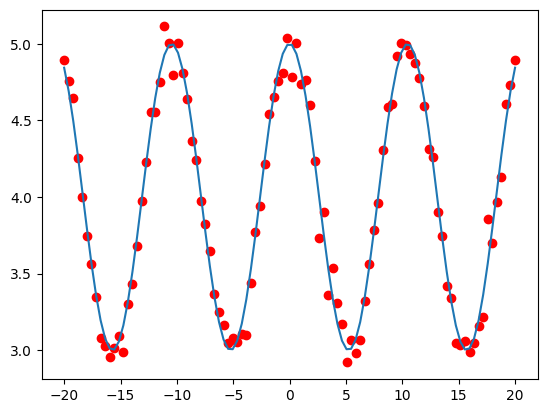

In [212]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-20, 20, 100)
y = np.cos(0.6*x)+4

plt.plot(x, y)

y = y + np.random.normal(0, 0.1, y.shape)µ
plt.scatter(x, y, color = 'red')
plt.show()

In [213]:
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [214]:
model = getPySrModel()
mod = fittingModel(model, x, y)

/usr/local/lib/python3.11/site-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.380e+05
Head worker occupation: 8.3%
Progress: 285 / 1500 total iterations (19.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           9.379e+00  7.971e+00  y = cos(0.23206)
3           4.962e-01  2.939e+00  y = 1.9884 * 1.9884
6           1.001e-02  1.301e+00  y = 3.9536 + cos(0.60128 * x₀)
8           8.881e-03  5.986e-02  y = cos(x₀ * 0.60127) + (1.9968 * 1.9968)
10          8.863e-03  1.015e-03  y = (1.9936 + 1.9936) + cos(0.60128 * (x₀ + -0.0097805))
12          8.783e-03  4.502e-03  y = (cos(x₀ * 0.60128) + (1.9936 + 1.9936)) + (-0.011089 / x₀)
14          8.735e-03  2.773e-03  y = (1.9936 + 1.9936) + cos((x₀ + (-0.15501 / (x₀ + -0.3962)))...
                                   * 0.60128)
15          8.704e-03  3.561e-03  y = (1.9936 + 1.9936) + cos(0.60128 * (x₀ + (-0.12676 / (x₀ + ...
                                  cos(1.99

In [216]:
print(mod.sympy)

<bound method PySRRegressor.sympy of PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                                 x0   
	1         2.803542e+00                                   cos(0.008198453)   
	2         2.922157e+00                              1.9883684 * 1.9883684   
	3         6.045878e-08                         4.4988437 + cos(-2.147489)   
	4         2.002192e-04                    3.9536765 + (-0.012836074 / x0)   
	5   >>>>  4.022915e+00                    3.987244 + cos(x0 / -1.6631786)   
	6         1.015200e-03    cos(0.6012759 * (x0 + -0.009819139)) + 3.987205   
	7         4.607890e-03  (3.9871998 + cos(x0 * 0.6012763)) + (-0.012868...   
	8         2.749168e-02  (3.9871993 + cos(x0 * 0.6012763)) + (0.0048178...   
	9         5.395211e-03  (3.9871993 + cos(x0 * -0.60126674)) + ((0.0048...   
	10        1.224446e-03  (cos(x0 * 0.6012763) + 3.9871993) + (0.0048178...  

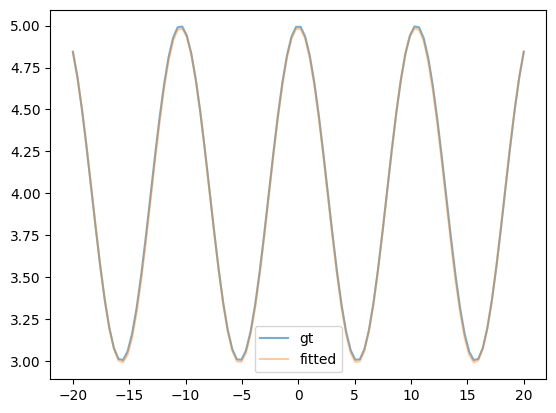

In [222]:
x = np.linspace(-20, 20, 100)
y = np.cos(0.6*x)+4
y2 = 3.987244 + np.cos(x / -1.6631786)

plt.plot(x, y, label = 'gt', alpha = 0.6)
plt.plot(x, y2, label = 'fitted', alpha = 0.4)
plt.legend()
plt.show()

In [95]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

def path_link(path:str):
    sys.path.append(path)

path_link('master/code/lib')

import features as ft
import simulation as sim 

In [100]:
data = sim.compute_main(100, (60, 3.5, 70, 0.5), 120, T = 1000)[0]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 1000/1000 [00:03<00:00, 270.08it/s]


In [223]:
from torch_geometric.data import Data
import features as ft
from tqdm import tqdm

def getInstance(graph, i, deg, edgesNumb):
    """ 
    Returns the input of the black box and the output

    Args:
    -----
        - `graph`
        - `i`: id of the node
        - `deg`: degree of the node
        - `edgesNumb`: array of the ids of the edges
    """
    nbFeatNode = 8
    nbEdge = 5
    val = np.zeros(nbFeatNode + nbEdge * deg)
    x = graph.x[i, 2:]
    val[:nbFeatNode] = x.numpy()

    for j in range(deg):
        try:
            val[(nbFeatNode+j*nbEdge):(nbFeatNode+(j+1)*nbEdge)]  = edgesNumb[j].numpy()
        except:
            print(f'deg >>> {deg}')
            print(f"val shape >> {val.shape}")
            print((nbFeatNode+j*nbEdge))
            print((nbFeatNode+(j+1)*nbEdge))
            print(f'edge number length: {len(edgesNumb)}')
            print(j)
            print('--------')

    yVal = graph.y[i, 0, :].numpy()

    return val, yVal


def getData(data, maxDegree):

    # prepare the result dictionnary

    X, Y, attr, inds = ft.processSimulation(data)

    timeDict = {}

    for t in range(len(X)):

        d = {}

        for i in range(maxDegree):
            d[i] = {}
            d[i]['X'] = []
            d[i]['Y'] = []
            d[i]['nodes_id'] = []

        graph = Data(x = X[t], y = Y[t], edge_attr=attr[t], edge_index=inds[t])

        nodeEdges = {}
        nodeEdges = {n: [] for n in range(graph.x.shape[0])}
    
        # get the degree of the nodes
        # node n, degree k ==> d[k][nodes_id] = n
        degrees = np.zeros(graph.x.shape[0])
        for n in range(graph.edge_index.shape[1]):
            id = graph.edge_index[0, n].item()
            degrees[id] += 1

            nodeEdges[id].append(graph.edge_attr[n, :])

        for i in range(graph.x.shape[0]):
            deg = degrees[i]
            if deg < maxDegree:
                d[deg]['nodes_id'].append(i)

            if deg != len(nodeEdges[i]):
                print("ultra issue")


        # create the dataset
        for deg in range(maxDegree):
            for n in d[deg]['nodes_id']:
                if len(nodeEdges[n]) != deg:
                    print('issue')
                    print("fnjvnfsj")
                x, y = getInstance(graph, n, deg, nodeEdges[n])
                d[deg]['X'].append(x)
                d[deg]['Y'].append(y)

        timeDict[t] = d


    return timeDict


def combineMat(d):
    for t in d.keys():
        for deg in d[t].keys():
            if len(d[t][deg]['X']):
                d[t][deg]['X'] = np.stack(d[t][deg]['X'])
                d[t][deg]['Y'] = np.stack(d[t][deg]['Y'])


    d2 = {}

    for t in d.keys():
        for deg in d[t].keys():
            if deg not in d2.keys():
                d2[deg] = {}
                d2[deg]['X'] = None
                d2[deg]['Y'] = None

            if len(d[t][deg]['X']) > 0:
                if d2[deg]['X'] is None:
                    d2[deg]['X'] = d[t][deg]['X']
                    d2[deg]['Y'] = d[t][deg]['Y']

                else:
                    d2[deg]['X'] = np.concatenate((d2[deg]['X'], d[t][deg]['X']), axis = 0)
                    d2[deg]['Y'] = np.concatenate((d2[deg]['Y'], d[t][deg]['Y']), axis = 0)


    return d2


import random

def getPySrData(X, Y, nb):
    inds = np.arange(X.shape[0])
    random.shuffle(inds)

    return X[inds[:nb], :], Y[inds[:nb], :]

In [251]:
d = getData(data.copy(), 500)
d2 = combineMat(d)

In [283]:
x, y = getPySrData(d2[1]['X'], d2[1]['Y'], 500)

In [284]:
mod = fittingModel(model, x, y, verbose = True)

>>>>> Fitting pySr


/usr/local/lib/python3.11/site-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/pysr/sr.py:1889: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


In [ ]:
mod.sympy()              

[0.4897203*v_x_0 + 0.4897203*v_x_1 + 0.4897203*Piecewise((v_y_2, 0.3357507*v_x_0*v_x_1 < 0), (0.0, True))/(v_x_1 + v_y_0),
 v_y_0 + Piecewise((0.711643129188776*v_y_3, v_x_0 + v_x_2/v_x_3 - 1.62188454 > 0), (0.0, True))]

In [ ]:
print(mod.equations)

/usr/local/lib/python3.11/site-packages/pysr/sr.py:1118: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


[   complexity      loss     score  \
0           1  0.005025  0.000000   
1           3  0.004968  0.005748   
2           5  0.004358  0.065440   
3           7  0.004358  0.000009   
4           9  0.004263  0.011085   
5          13  0.004099  0.009789   
6          17  0.004064  0.002121   

                                            equation  \
0                                              v_x_0   
1                                 v_x_0 * 0.98004824   
2                        (v_x_0 + v_x_1) * 0.4897203   
3      ((v_x_0 + v_x_1) * 0.4897218) + 0.00027577282   
4   0.24528553 * (v_x_3 + ((v_x_0 + v_x_1) + v_x_0))   
5  ((v_x_1 + cond((v_x_0 * -0.3357507) / v_x_1, 0...   
6  0.4897203 * ((v_x_1 + (cond((v_x_1 * -0.335750...   

                                        sympy_format  \
0                                              v_x_0   
1                                   0.98004824*v_x_0   
2                  0.4897203*v_x_0 + 0.4897203*v_x_1   
3  0.4897218*v_x_0 + 0.489721

In [260]:
a = mod.equations

/usr/local/lib/python3.11/site-packages/pysr/sr.py:1118: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


In [248]:
print(a[0]['equation'].values[-1])

(((x6 / cos(0.68906647)) + x2) + (x4 * cos(x6 * (x6 * (cos(x6) / x0))))) * 0.31129023


In [243]:
def plotCompLoss(a):
    comp = a['complexity']
    loss = a['loss']
    score = a['score']

    plt.plot(comp, score)
    plt.show()

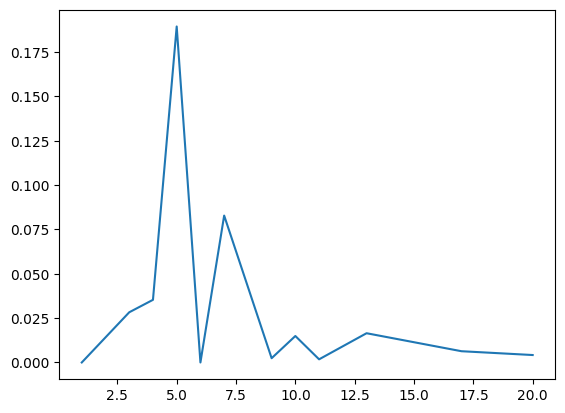

In [244]:
plotCompLoss(a[0])

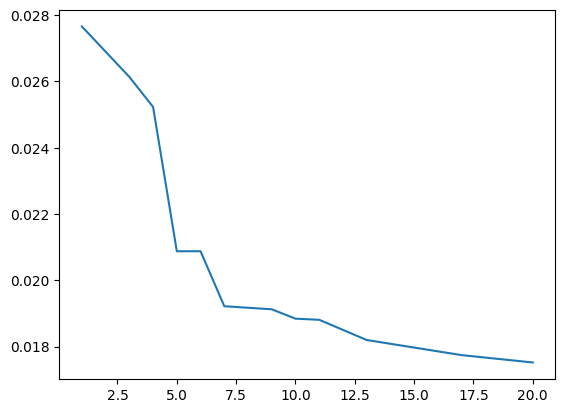

In [242]:
plotCompLoss(a[0])

In [240]:
print(a[0]['loss'])

0     0.027660
1     0.026138
2     0.025231
3     0.020877
4     0.020877
5     0.019218
6     0.019126
7     0.018843
8     0.018809
9     0.018199
10    0.017743
11    0.017521
Name: loss, dtype: float64


In [261]:
mod.sympy()

[0.48391053*x4 + 0.48391053*x6, 0.501472373034466*x1 + 0.501472373034466*x3]

In [165]:
print(d[30][0]['X'].shape)

(5, 8)


In [185]:
print(d2[25]['X'].shape)

(2, 133)


In [177]:
print(list(d2.keys()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [152]:
d2 = combineMat(d)

In [153]:
print(d2[30][0])

{'X': array([[ 0.40335768,  0.44418755,  0.40335768,  0.44418755,  0.40335768,
         0.44418755,  0.40335768,  0.44418755],
       [ 0.41509566,  0.43323851,  0.41509566,  0.43323851,  0.41509566,
         0.43323851,  0.41509566,  0.43323851],
       [ 0.17273782,  0.57459694,  0.17273782,  0.57459694,  0.17273782,
         0.57459694,  0.17273782,  0.57459694],
       [-0.17487696, -0.57394952, -0.17487696, -0.57394952, -0.17487696,
        -0.57394952, -0.17487696, -0.57394952],
       [ 0.59105515, -0.10321718,  0.59105515, -0.10321718,  0.59105515,
        -0.10321718,  0.59105515, -0.10321718]]), 'Y': array([[ 0.40335768,  0.44418755],
       [ 0.41509566,  0.4332385 ],
       [ 0.17273782,  0.57459694],
       [-0.17487696, -0.5739495 ],
       [ 0.59105515, -0.10321718]], dtype=float32), 'nodes_id': [15, 58, 82, 85, 99]}


In [156]:
print(d2[30][0]['X'].shape)

(5, 8)


In [139]:
d[1][18]

{'X': [array([-0.33811781,  0.86786097,  0.80581695, -0.93816346,  0.        ,
          0.        ,  0.        ,  0.        ,  5.43733168, -0.95757192,
          0.28819448,  1.        ,  1.        ,  4.86469698,  0.09957147,
         -0.9950304 ,  1.        ,  1.        ,  3.45567846,  0.99978346,
          0.02081024,  1.        ,  1.        ,  2.90812087,  0.14838324,
         -0.98892993,  1.        ,  1.        ,  3.13120174,  0.13486972,
         -0.99086332,  1.        ,  1.        ,  5.24470854,  0.20555103,
          0.9786464 ,  1.        ,  1.        ,  2.45623446, -0.99664849,
          0.0818034 ,  1.        ,  1.        ,  4.59447908, -0.88601857,
          0.46364978,  1.        ,  1.        ,  5.68886518, -0.12381926,
          0.9923048 ,  1.        ,  1.        ,  3.37569141, -0.89722824,
         -0.44156706,  1.        ,  1.        ,  4.77314281, -0.34288204,
         -0.9393785 ,  1.        ,  1.        ,  5.61761618,  0.61068457,
         -0.79187393,  1.        

In [104]:
d[1][18]

[tensor([ 4.2535,  0.3574, -0.9339,  1.0000,  1.0000]),
 tensor([ 5.0474, -0.7680, -0.6404,  1.0000,  1.0000]),
 tensor([ 5.3384, -0.2003, -0.9797,  1.0000,  1.0000]),
 tensor([ 5.2678, -0.5038, -0.8638,  1.0000,  1.0000]),
 tensor([ 5.7509, -0.8881, -0.4596,  1.0000,  1.0000]),
 tensor([ 5.5385,  0.1864, -0.9825,  1.0000,  1.0000]),
 tensor([ 3.5868, -0.8697, -0.4936,  1.0000,  1.0000])]

### ---- test mesasge

In [11]:
import numpy as np
messages = np.load('/master/tests/messages.npy')
feats = np.load('/master/tests/feats.npy')

In [12]:
print(messages.shape)
print(feats.shape)

(1536, 5)
(1536, 4)


In [13]:
model = getPySrModel()

In [15]:
mod = fittingModel(model, messages, feats, verbose = True, variables = ['dist', 'a', 'b', 'r1', 'r2'])

>>>>> Fitting pySr
Compiling Julia backend...


/usr/local/lib/python3.11/site-packages/pysr/sr.py:1837: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.430e+03
Head worker occupation: 31.1%. This is high, and will prevent efficient resource usage. Increase `ncycles_per_iteration` to reduce load on head worker.
Progress: 6 / 6000 total iterations (0.100%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           1.040e-02  5.314e+00  y₀ = -0.043186 * -1.7885
5           1.040e-02  3.591e-05  y₀ = (r2 * -0.098714) * -0.77368
7           7.990e-03  1.320e-01  y₀ = 0.2656 / ((dist + 0.44629) * 1.3579)
13          6.254e-03  4.082e-02  y₀ = (-0.19838 / (-1.7388 + ((dist * (dist / 0.81185)) * -0.19...
                                  838))) * 1.4571
15          4.924e-03  1.196e-01  y₀ = ((-0.19838 / (-1.7388 + ((dist * (dist / 0.81185)) * -0.1...
                                  9838))) / 0.67469) * 1.4571
17          4.851e-03  7.527e-03  y₀ = ((-0.19838 / (-1.7388

In [ ]:
print(mod.equations)

In [16]:
mod.sympy()

[Piecewise((0.20088002, 0.067136124 - 0.22979921/dist < 0), (0.0, True))/(1.14358449759011 - 0.06087034432771*dist),
 dist*(0.024328273*dist - 0.15483026) + Piecewise((-0.16478804, 0.430078342077118*dist - 1.60315673622875 < 0), (0.0, True)),
 -0.03732625*dist - 0.03732625*r1 - 0.2299015 + Piecewise((3.2333746, dist - 2.748676566 > 0), (0.0, True))/dist,
 0.38496062*Piecewise((dist, (-0.06954125 + 0.23579904/dist)/r2 > 0), (0.0, True)) + 0.10995662 + Piecewise((0.15052453, r1 > 0), (0.0, True))/dist]

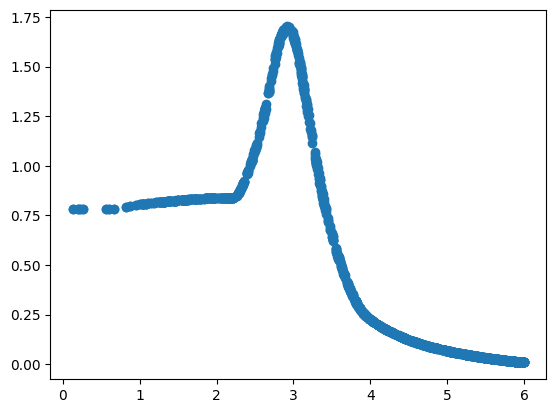

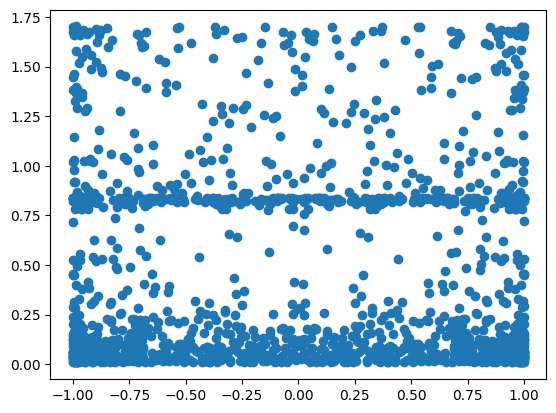

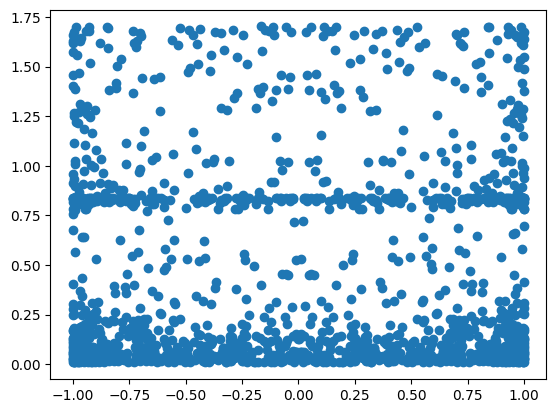

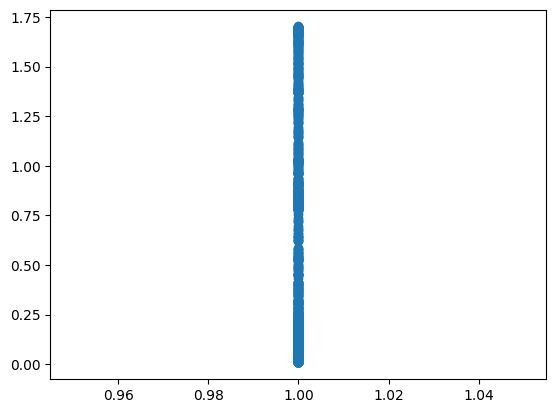

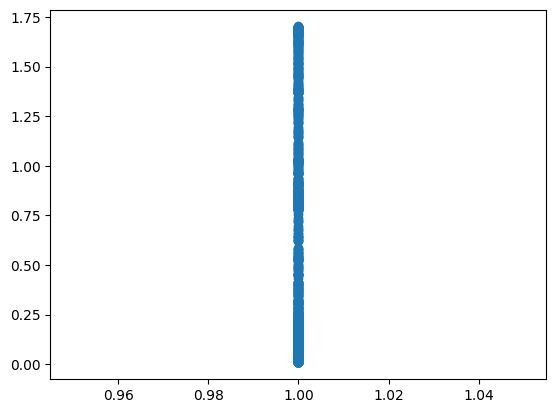

In [30]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.scatter(messages[:, i], feats[:, 3])
    plt.show()

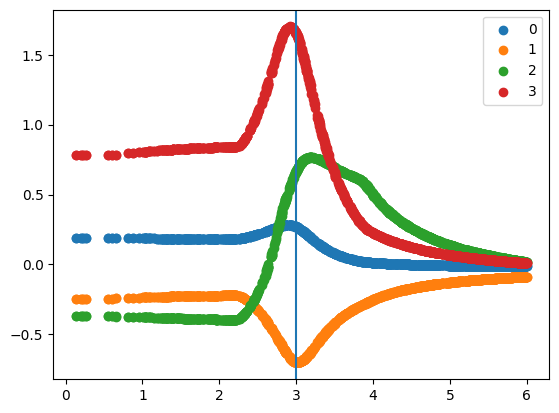

In [44]:
for i in range(4):
    plt.scatter(messages[:, 0], feats[:, i], label = f'{i}')
plt.legend()
plt.axvline(x=3)
plt.show()

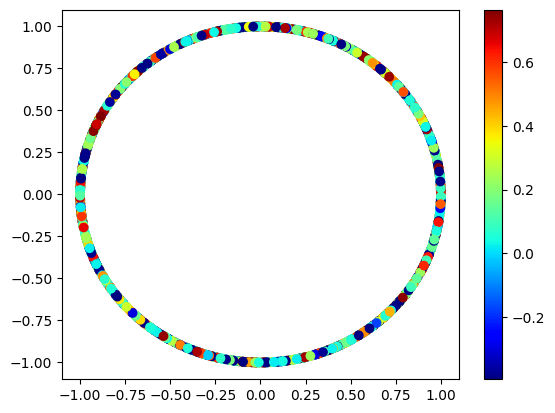

In [39]:
plt.scatter(messages[:, 1], messages[:, 2], c = feats[:, 2], cmap = 'jet')
plt.colorbar()
plt.show()